In [1]:
import pyfair

In [2]:
    from pyfair import FairModel
    

    # Create an incomplete model
    model = FairModel('Tree Test')
    model.input_data('Loss Event Frequency', mean=5, stdev=1)
    model.calculate_all()
    
 

FairException: Not ready for calculation. See statuses: 
Risk                                  Required
Loss Event Frequency                  Supplied
Threat Event Frequency            Not Required
Contact                           Not Required
Action                            Not Required
Vulnerability                     Not Required
Control Strength                  Not Required
Threat Capability                 Not Required
Loss Magnitude                        Required
Primary Loss                          Required
Secondary Loss                        Required
Secondary Loss Event Frequency        Required
Secondary Loss Event Magnitude        Required
dtype: object

In [5]:
import scipy.stats as stats

s = stats.norm(loc=100, scale=50)
s.rvs(3)

array([198.47586524, 150.11389796,  86.89533848])

In [15]:
import pandas as pd

pd.Series([
    10_512_018,
    0,
    3_841_190
]).std()

5319104.079542093

In [42]:
import scipy.stats as stats

import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')

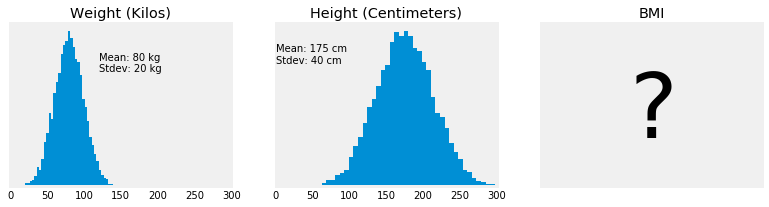

In [12]:
fig, axes = plt.subplots(1,3)

heights = stats.norm.rvs(loc=175, scale=40, size=10_000)
weights = stats.norm.rvs(loc=80, scale=20, size=10_000)

# Height
axes[1].hist(heights, bins=50)
axes[1].set_title('Height (Centimeters)')
axes[1].set_xlim((0, 300))
axes[1].grid(False)
axes[1].text(0,500, 'Mean: 175 cm\nStdev: 40 cm')
axes[1].yaxis.set_ticks([])

# Weight
axes[0].hist(weights, bins=50)
axes[0].set_title('Weight (Kilos)')
axes[0].set_xlim((0, 300))
axes[0].grid(False)
axes[0].text(120,500, 'Mean: 80 kg\nStdev: 20 kg')
axes[0].yaxis.set_ticks([])

# BMI
axes[2].set_title('BMI')

axes[2].xaxis.set_ticks([])
axes[2].yaxis.set_ticks([])
axes[2].text(.4,.3,'?', fontsize=90)

fig.set_size_inches(12, 3)


$
\Large{\text{BMI}} = \huge{
    \frac
        {\text{Weight}_{kg}}
        {(\text{Height}_{cm} \times .01) ^2}
}
$

In [6]:
80 / (150 * .01) ** 2

35.55555555555556

In [ ]:
5 + 5

In [7]:
import pandas as pd
import scipy.stats as stats

heights = stats.norm.rvs(loc=175, scale=40, size=3)
weights = stats.norm.rvs(loc=80, scale=20, size=3)

df = pd.DataFrame({'height': heights, 'weight':weights})

In [8]:
def get_bmi(row):
    h = row['height']
    w = row['weight']
    bmi = w / (h * .01) ** 2
    return bmi

df['bmi'] = df.apply(get_bmi, axis=1)
df

,height,weight,bmi
0,164.606021,63.909336,23.587009
1,230.353776,74.972730,14.129040
2,246.915053,58.501501,9.595594


In [ ]:


heights = pd.Series(stats.norm.rvs(loc=175, scale=40, size=10_000))
weights = pd.Series(stats.norm.rvs(loc=80, scale=20, size=10_000))
df = pd.DataFrame({'height': heights, 'weight':weights})
df['bmi'] = df.apply(get_bmi, axis=1)
df = df.round(2)
bmis = df['bmi']


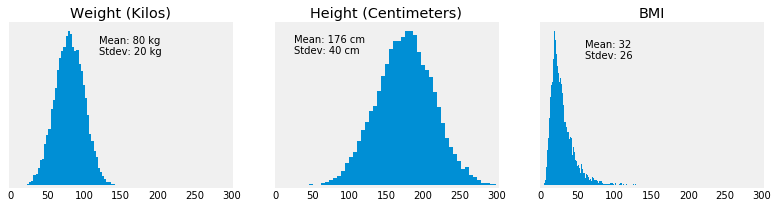

In [41]:
fig, axes = plt.subplots(1,3)

# Height
axes[1].hist(heights, bins=50)
axes[1].set_title('Height (Centimeters)')
axes[1].set_xlim((0, 300))
axes[1].grid(False)
axes[1].text(25,480, 'Mean: {} cm\nStdev: {} cm'.format(round(heights.mean()), round(heights.std())))
axes[1].yaxis.set_ticks([])

# Weight
axes[0].hist(weights, bins=50)
axes[0].set_title('Weight (Kilos)')
axes[0].set_xlim((0, 300))
axes[0].grid(False)
axes[0].text(120,500, 'Mean: {} kg\nStdev: {} kg'.format(round(weights.mean()), round(weights.std())))
axes[0].yaxis.set_ticks([])

# BMI
axes[2].set_title('BMI')
axes[2].hist(bmis, bins=1000)
axes[2].set_xlim((0, 300))
axes[2].grid(False)
axes[2].text(60, 210, 'Mean: {}\nStdev: {}'.format(round(bmis.mean()), round(bmis.std())))
axes[2].yaxis.set_ticks([])

fig.set_size_inches(12, 3)

In [24]:
bmis

array([20.99692202, 23.99979115, 23.02600969, ..., 42.82278335,
       14.7383338 , 24.56640589])

(<Figure size 1440x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26403b71198>)

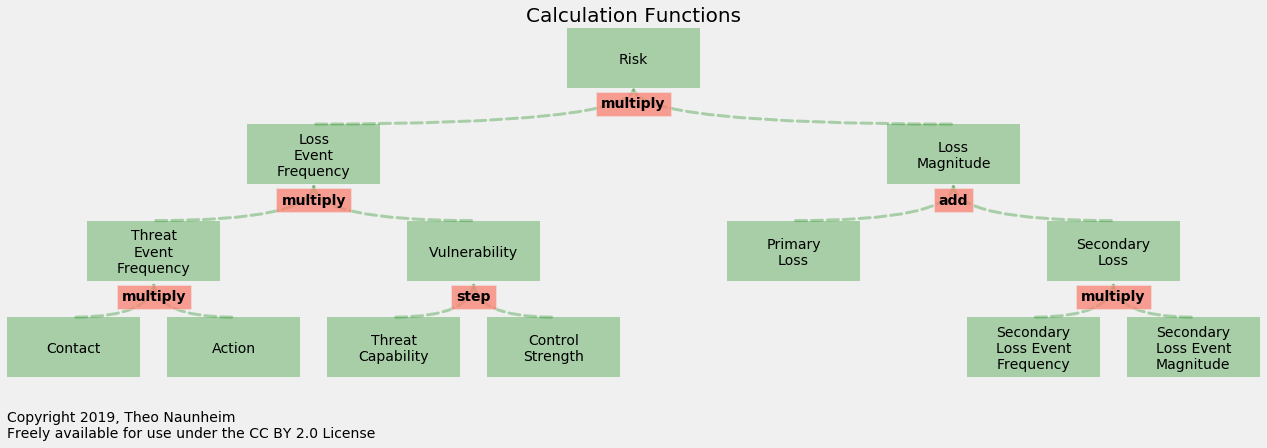

In [121]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


class FairTreeGraph(object):
    '''Provides a pretty tree diagram to summarize calculations.
    
    '''
    
    # Class attribute
    DIMENSIONS = pd.DataFrame.from_dict({
    'Contact'                       : ['Contact'   ,    0,    0,  600,  800, 'green', None],
    'Threat Event Frequency'        : ['Threat\nEvent\nFrequency' ,  600,  800, 1800, 1600, 'green', 'multiply'],
    'Action'                        : ['Action'   , 1200,    0,  600,  800, 'green', None],
    'Threat Capability'             : ['Threat\nCapability'  , 2400,    0, 3000,  800, 'green', None],
    'Vulnerability'                 : ['Vulnerability'   , 3000,  800, 1800, 1600, 'green', 'step'],
    'Control Strength'              : ['Control\nStrength'  , 3600,    0, 3000,  800, 'green', None],
    'Loss Magnitude'                : ['Loss\nMagnitude'  , 6600, 1600, 4200, 2400, 'green', 'add'],
    'Loss Event Frequency'          : ['Loss\nEvent\nFrequency', 1800, 1600, 4200, 2400, 'green', 'multiply'],
    'Risk'                          : ['Risk'   , 4200, 2400, 4200, 5000, 'green', 'multiply'],
    'Primary Loss'                  : ['Primary\nLoss'  , 5400,  800, 6600, 1600, 'green', None],
    'Secondary Loss'                : ['Secondary\nLoss'  , 7800,  800, 6600, 1600, 'green', 'multiply'],
    'Secondary Loss Event Frequency': ['Secondary\nLoss Event\nFrequency', 7200,    0, 7800,  800, 'green', None],
    'Secondary Loss Event Magnitude': ['Secondary\nLoss Event\nMagnitude', 8400,    0, 7800,  800, 'green', None],
}, orient='index', columns=['tag', 'self_x', 'self_y', 'parent_x', 'parent_y', 'color', 'function'])
    
    def __init__(self):
        self._colormap = {'Not Required': 'grey', 'Supplied': 'green', 'Calculated': 'blue'}


    def _process_statuses(self):
        '''Turn dict into df and add color column'''
        self._statuses = pd.DataFrame.from_records([self._statuses]).T
        self._statuses.columns = ['status']
        self._statuses['color'] = self._statuses['status'].map(self._colormap)
        
    def _tweak_axes(self, ax):
        # Set limits
        ax.set_title('Calculation Functions', fontsize=20)
        ax.set_xlim(0, 9_400)
        ax.set_ylim(0, 2_900)
        # Disappear axes and spines
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_visible(False)
        for spine_name in ['left', 'right', 'top', 'bottom']:
            ax.spines[spine_name].set_visible(False)
        return ax
    
    def _generate_rects(self, ax):
        '''Cannot be done via apply'''
        patches = []
        patch_colors = []
        for index, row in self.DIMENSIONS.iterrows():
            rect = Rectangle(
                (row['self_x'], row['self_y']),
                1000,
                500,
                alpha=.3,
            )
            patches.append(rect)
            patch_colors.append(row['color'])
        collection = PatchCollection(patches, facecolor=patch_colors, alpha=.3)
        ax.add_collection(collection)
        return ax
    
    def _generate_text(self, row, ax):
        '''Apply-able function'''
        # Draw header
        plt.text(
            row['self_x'] + 500, 
            row['self_y'] + 240, 
            row['tag'], 
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='medium',
        )
        # Draw data
        if row['function']:
            plt.text(
                row['self_x'] + 500, 
                row['self_y'] - 130, 
                row['function'], 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=14,
                fontweight='bold',
                bbox={'facecolor':'salmon', 'alpha':.75, 'pad':5},
                zorder=3
            )
       

    def _generate_lines(self, row, ax):
        '''Generate lines between boxes'''
        if row.name != 'Risk':
            ax.annotate(
                None,
                xy=(row['parent_x'] + 500, row['parent_y']), 
                xytext=(row['self_x'] + 500, row['self_y'] + 500),     
                arrowprops=dict(
                    arrowstyle="-",
                    connectionstyle="angle3,angleA=0,angleB=-90",
                    ec=row['color'],
                    alpha=.3,
                    linestyle='--', 
                    linewidth=3
                ),
            )
            
    def _generate_legend(self, ax):
        # Gen legend
        patches = [Patch(color=color, label=label, alpha=.3) for label, color in self._colormap.items()]
        plt.legend(handles=patches, frameon=False)

    def generate_image(self):
        fig, ax = plt.subplots()
        fig.set_size_inches(20,6)
        self.DIMENSIONS.apply(self._generate_lines, args=[ax], axis=1)
        ax = self._tweak_axes(ax)
        self.DIMENSIONS.apply(self._generate_text, args=[ax], axis=1)
        self._generate_rects(ax)

        ax.text(0, -500, 'Copyright 2019, Theo Naunheim\nFreely available for use under the CC BY 2.0 License')
        #self._generate_legend(ax)
        return (fig, ax)

    
FairTreeGraph().generate_image()